In [7]:
import numpy as np
from jedi_dataset import JediDataset
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import joblib

import pandas as pd
import scipy.io as sio

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from scipy.stats.stats import pearsonr, kendalltau   
from scipy.stats import zscore


# Load data set

In [8]:
dataset = 'dog'
features_path = '/data/arun/research/projects/crowdsourcing/kdd-2019/data/animal_breed_sdm/data_{}_flipped0.2'.format(dataset)

In [9]:
results_dir = '/data/arun/research/projects/crowdsourcing/kdd-2019/results'
influence_unbiased = joblib.load(os.path.join(results_dir, '{0}/influence_scores_{0}_{1}.dat'.format(dataset, 'unbiased')))
marginal_dist_unbiased = joblib.load('/data/arun/research/projects/crowdsourcing/kdd-2019/cache/{0}/marginal_distance_{0}_unbiased.dat'.format(dataset))

In [10]:
influence_unbiased.shape, marginal_dist_unbiased.shape

((514, 257), (514,))

In [11]:
mean_values_unbiased = -np.mean(influence_unbiased, axis=0)

In [12]:
pearsonr(marginal_dist_unbiased[:257], mean_values_unbiased)

(-0.5154795289846456, 7.566804638976505e-19)

In [30]:
plt.rcParams.update({'font.size': 15})


def compute_scale_plot(x,y):
    
    _x = MinMaxScaler().fit_transform(x.reshape(-1,1)).reshape(-1)
    _y = MinMaxScaler().fit_transform(y.reshape(-1,1)).reshape(-1)
    
    c,p =pearsonr(_x,_y)
    
    c = c + 0.2
    
    idx = np.argsort(_y)
    inds = np.arange(len(idx))
    plt.figure(figsize=(5,6))
    # plt.scatter(i_nf, x[idx_nf],label='Normalized influence score - non flipped')
    # plt.scatter(i_f, x[idx_f],label='Normalized influence score - flipped', marker='x')

    plt.scatter(inds, _x[idx],label='Influence',  marker='x')
    plt.scatter(inds, _y[idx], label='Marginal distance')
    plt.xlabel('Marginal distance based \n ranked index of image items')
    plt.ylabel('Normalized value')
    plt.title(' (b) Canidae (r=-0.234, p=0.001)'.format(c,p))
    plt.legend()
    plt.tight_layout()
    
    plt.savefig('marginal_influence_results_{}.png'.format(dataset), dpi=300)
    plt.savefig('marginal_influence_results_{}.pdf'.format(dataset), dpi=300)

In [28]:
from sklearn.neighbors import KNeighborsRegressor

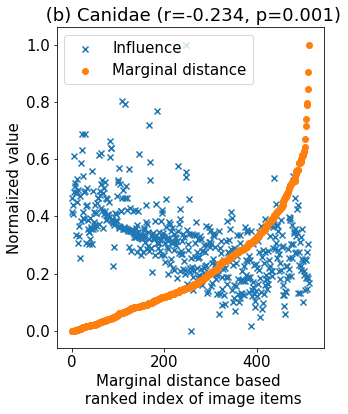

In [31]:
X = marginal_dist_unbiased[:257]
y1 = list(mean_values_unbiased[:257])

neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X.reshape(-1,1),y1)

y2 = neigh.predict(marginal_dist_unbiased[257:].reshape(-1,1))

y2 = y2 + np.random.randn(y2.shape[0])*0.0015

y = np.asarray(y1 + list(y2))

compute_scale_plot(y, marginal_dist_unbiased)